In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
def perform_two_tailed_hypothesis_test(alpha,t_score,df):
    # Generate x values for the plot
    x = np.linspace(-5, 5, 1000)

    # Calculate the critical values for a two-tailed test
    critical_value_left = stats.t.ppf(alpha / 2,df)
    critical_value_right = stats.t.ppf(1 - alpha / 2,df)

    # Print the z-score and critical value
    print("t-score:", t_score)
    print("Critical Value:", (critical_value_left,critical_value_right))

    if np.abs(t_score) > critical_value_right:
        print("Reject Null Hypothesis (H0)")
    else:
        print("Fail to Reject Null Hypothesis (H0)")


    # Plot the standard normal distribution
    plt.plot(x, stats.t.pdf(x,df), label='Student t-Distribution')

    # Shade the left critical region
    plt.fill_between(x[x < critical_value_left], 0, stats.t.pdf(x[x < critical_value_left],df), color='red', alpha=0.5)

    # Shade the right critical region
    plt.fill_between(x[x > critical_value_right], 0, stats.t.pdf(x[x > critical_value_right],df), color='red', alpha=0.5)

    # Plot vertical lines at the critical values
    plt.axvline(critical_value_left, color='red', linestyle='--', label='Critical Value')
    plt.axvline(critical_value_right, color='red', linestyle='--')
    plt.axvline(t_score, color='green', linestyle='--',label='t score')
    plt.axhline(y=0,linewidth=3,color='black')



    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Two-Tailed Hypothesis Test')
    plt.legend()

    # Show plot
    plt.show()

### Question 1

In [3]:
group_1 = [6,7,6,5,6]
group_2 = [8,5,8,6,8]
group_3 = [7,9,6,8,5]
group_4 = [8,5,6,6,5]
df = pd.DataFrame({'Programmed lectures':group_1,'Lecture':group_2,'TV':group_3,'Group Discussions':group_4})
print(stats.f_oneway(group_1,group_2,group_3,group_4))

F_onewayResult(statistic=1.0256410256410258, pvalue=0.40751036112781147)


### Question 3

In [4]:
group_1 = [10, 11, 12, 10, 12]
group_2 = [8, 9, 10, 8]
group_3 = [7, 8, 6, 7, 6]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


             sum_sq    df          F    PR(>F)
Group     44.164286   2.0  25.434929  0.000075
Residual   9.550000  11.0        NaN       NaN


### Question 3

              sum_sq   df          F    PR(>F)
Group     107.200000  2.0  50.957746  0.000012
Residual    9.466667  9.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-7.4667,0.0,-9.5579,-5.3755,True
Group 1,Group 3,-5.6667,0.0001,-7.8537,-3.4797,True
Group 2,Group 3,1.8,0.0657,-0.1209,3.7209,False


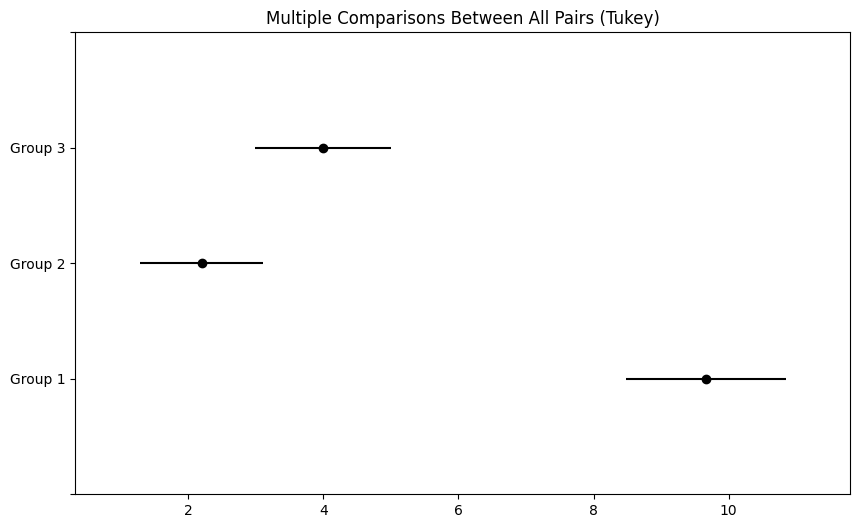

In [5]:
group_1 = [8,11,10]
group_2 = [3,2,1,3,2]
group_3 = [3,4,5,4]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 4

             sum_sq    df         F    PR(>F)
Group     46.958333   2.0  9.303066  0.001279
Residual  53.000000  21.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,3.5,0.001,1.4322,5.5678,True
Group 1,Group 3,1.75,0.1274,-0.4126,3.9126,False
Group 2,Group 3,-1.75,0.0745,-3.6494,0.1494,False


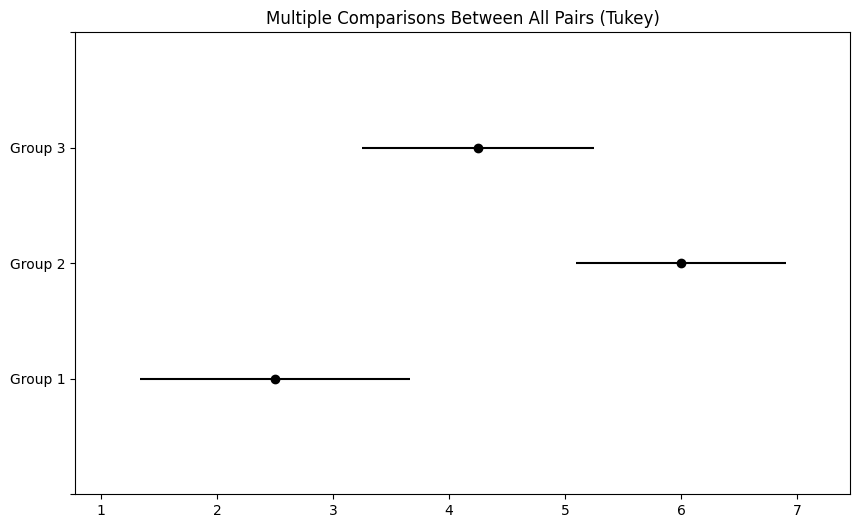

In [6]:
group_1 = [3,2,5,1,3,1]
group_2 = [9,6,5,6,8,5,4,7,6,4]
group_3 = [6,3,5,5,5,4,1,5]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 5

             sum_sq    df         F    PR(>F)
Group     32.333333   3.0  2.360097  0.132857
Residual  45.666667  10.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-0.5,0.9868,-5.1229,4.1229,False
Group 1,Group 3,3.3333,0.2362,-1.66,8.3266,False
Group 1,Group 4,2.0,0.6259,-2.9933,6.9933,False
Group 2,Group 3,3.8333,0.1512,-1.16,8.8266,False
Group 2,Group 4,2.5,0.4557,-2.4933,7.4933,False
Group 3,Group 4,-1.3333,0.8687,-6.6714,4.0047,False


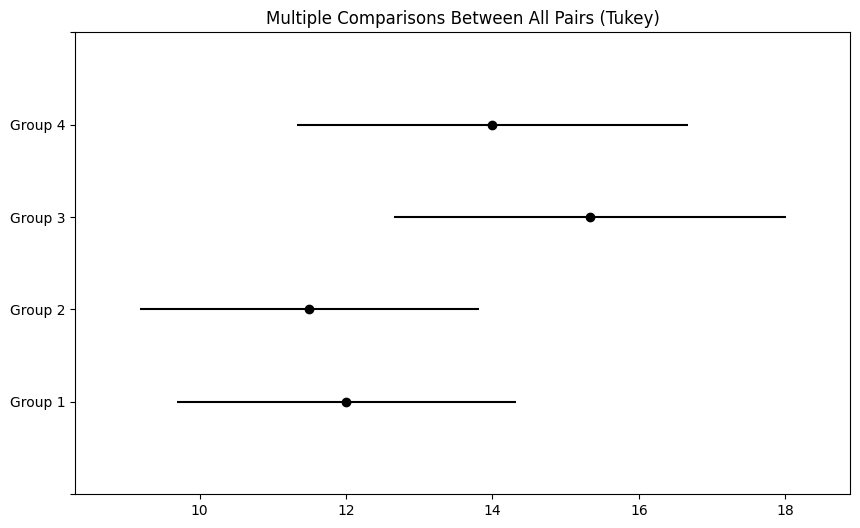

In [8]:
group_1 = [12,10,14,12]
group_2 = [14,12,10,10]
group_3 = [18,12,16]
group_4 = [12,14,16]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3)+
                             ['Group 4'] * len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 6

             sum_sq    df          F    PR(>F)
Group     86.491375   2.0  13.090108  0.000769
Residual  42.948000  13.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-5.78,0.0006,-8.8153,-2.7447,True
Group 1,Group 3,-2.0,0.2026,-4.9061,0.9061,False
Group 2,Group 3,3.78,0.0115,0.8739,6.6861,True


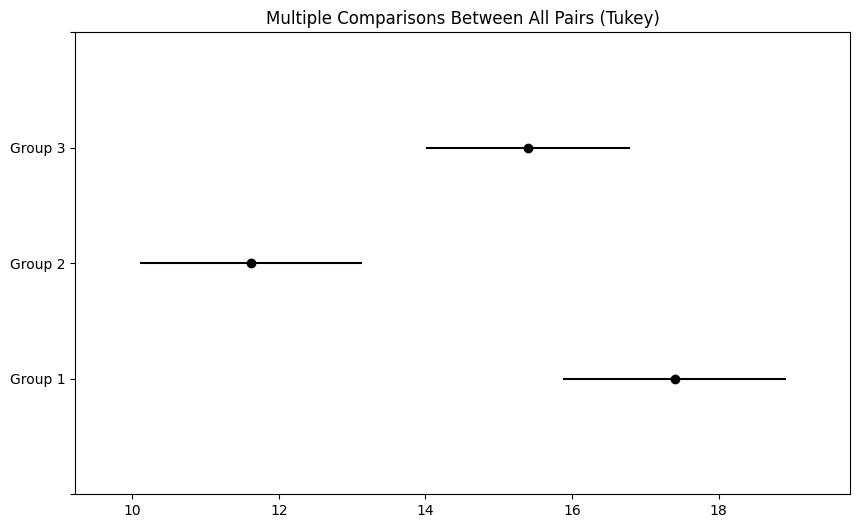

In [9]:
group_1 = [14.3,18.1,17.8,17.3,19.5]
group_2 = [11.5,12,11.1,11.9,11.6]
group_3 = [15.5,12.7,18.2,14.7,18.1,13.2]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


# Two factor ANOVA analysis

### Question 7

In [15]:

dry = [7,11,13,8,9]
normal = [9,12,11,9,10]
oily = [12,14,8,7,13]
month = ['June','July','August','September','October']

df = pd.DataFrame({'Month':month,'Dry':dry,'Normal':normal,'Oily':oily})
df_long =pd.melt(df,id_vars=['Month'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Month + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
anova_result


,sum_sq,df,F,PR(>F)
Month,31.733333,4.0,1.712230,0.239694
variable,3.600000,2.0,0.388489,0.690208
Residual,37.066667,8.0,NaN,NaN


### Question 8

In [19]:

treatment_1 = [46,37,44]
treatment_2 = [21,26,35]
block = ['A','B','C']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
anova_result


,sum_sq,df,F,PR(>F)
Block,69.333333,2.0,0.912281,0.522936
variable,337.500000,1.0,8.881579,0.096560
Residual,76.000000,2.0,NaN,NaN


### Question 9

In [21]:

treatment_1 = [12,9,7]
treatment_2 = [14,11,8]
treatment_3 = [8,9,8]
block = ['A','B','C']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
anova_result


,sum_sq,df,F,PR(>F)
Block,20.222222,2.0,3.64,0.125748
variable,10.888889,2.0,1.96,0.255076
Residual,11.111111,4.0,NaN,NaN


### Question 10

In [22]:

treatment_1 = [31,33,28,30,28]
treatment_2 = [25,26,24,29,26]
treatment_3 = [35,33,30,28,27]
block = ['Skaff','Lum','Clark','Treece','Morgan']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
anova_result


,sum_sq,df,F,PR(>F)
Block,33.733333,4.0,1.552147,0.276152
variable,62.533333,2.0,5.754601,0.028275
Residual,43.466667,8.0,NaN,NaN


### Question 11

In [24]:

treatment_1 = [14,20,16,18,20]
treatment_2 = [18,24,22,20,28]
treatment_3 = [24,14,14,22,24]
block = ['Monday','Tuesday','Wednesday','Thursday','Friday']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
anova_result


,sum_sq,df,F,PR(>F)
Block,75.733333,4.0,1.285068,0.352359
variable,58.133333,2.0,1.972851,0.201147
Residual,117.866667,8.0,NaN,NaN


### Question 12

             sum_sq    df          F    PR(>F)
Group     26.133333   2.0  13.517241  0.000844
Residual  11.600000  12.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,1.2,0.1728,-0.4589,2.8589,False
Group 1,Group 3,3.2,0.0007,1.5411,4.8589,True
Group 2,Group 3,2.0,0.0188,0.3411,3.6589,True


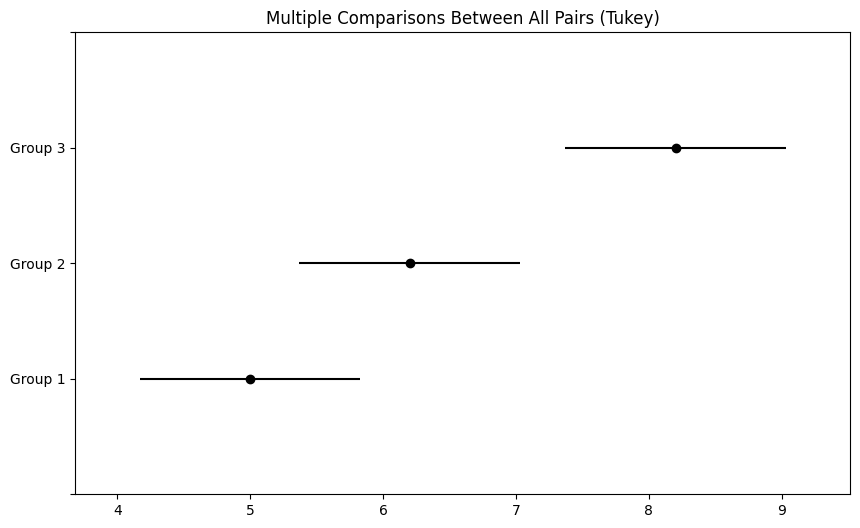

In [25]:
group_1 = [5,7,4,5,4]
group_2 = [6,7,7,5,6]
group_3 = [7,8,9,8,9]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 13

             sum_sq    df         F    PR(>F)
Group     87.791667   3.0  9.121212  0.000523
Residual  64.166667  20.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,3.6667,0.0101,0.7722,6.5612,True
Group 1,Group 3,-0.8333,0.8509,-3.7278,2.0612,False
Group 1,Group 4,3.0,0.0405,0.1055,5.8945,True
Group 2,Group 3,-4.5,0.0016,-7.3945,-1.6055,True
Group 2,Group 4,-0.6667,0.9162,-3.5612,2.2278,False
Group 3,Group 4,3.8333,0.007,0.9388,6.7278,True


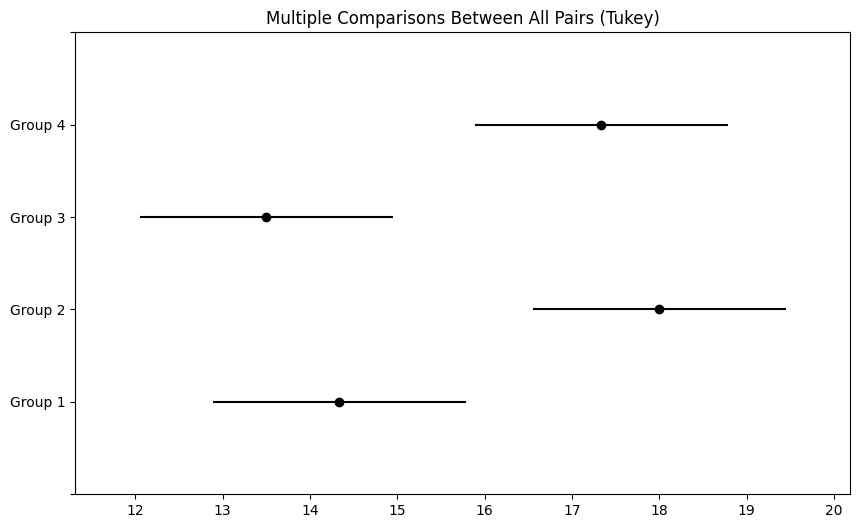

In [26]:
group_1 = [13,15,14,15,14,15]
group_2 = [21,13,18,19,18,19]
group_3 = [12,14,15,13,12,15]
group_4 = [16,17,18,15,20,18]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3)+
                             ['Group 4'] * len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 14

              sum_sq    df        F    PR(>F)
Group     116.315873   2.0  5.08783  0.020574
Residual  171.461905  15.0      NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-5.4524,0.028,-10.3382,-0.5666,True
Group 1,Group 3,-4.8857,0.0637,-10.0279,0.2564,False
Group 2,Group 3,0.5667,0.9588,-4.751,5.8844,False


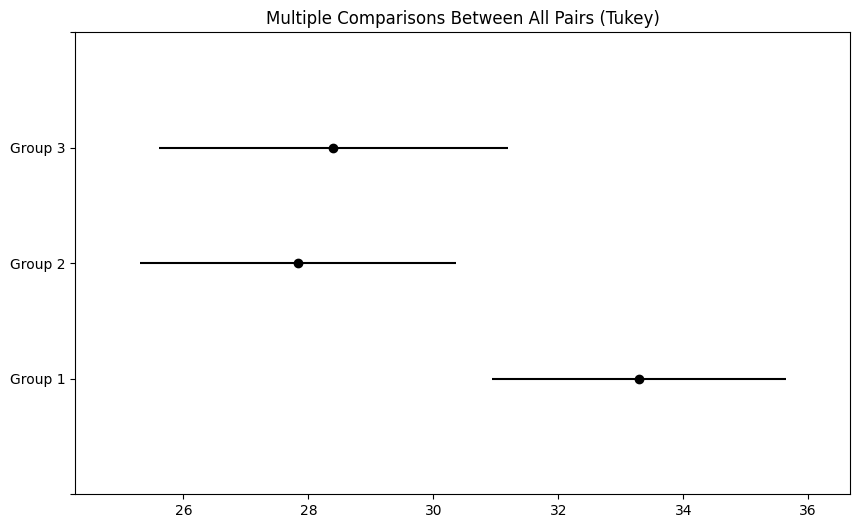

In [29]:
group_1 = [35,30,36,38,29,34,31]
group_2 = [28,24,25,30,32,28]
group_3 = [24,28,26,30,34]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 15

            sum_sq   df         F    PR(>F)
Group     6.447167  2.0  10.98117  0.003849
Residual  2.642000  9.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-0.55,0.4153,-1.7054,0.6054,False
Group 1,Group 3,1.19,0.0236,0.1752,2.2048,True
Group 2,Group 3,1.74,0.0044,0.6353,2.8447,True


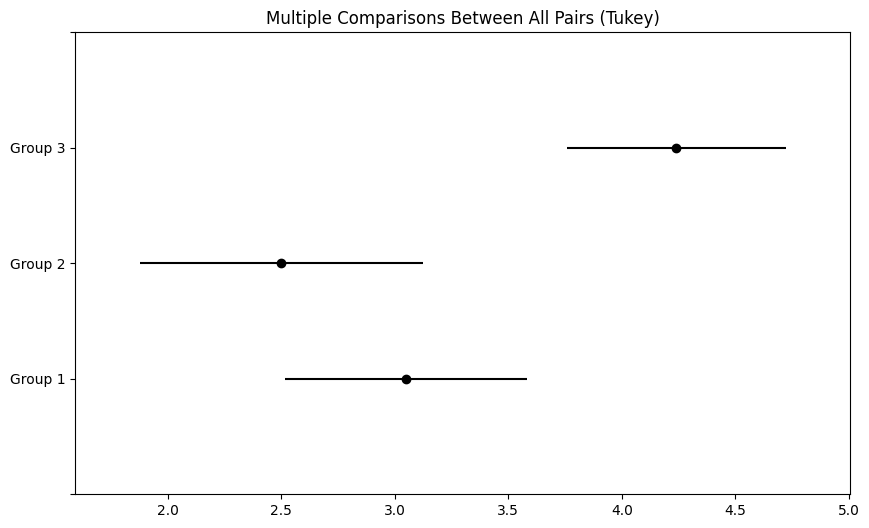

In [32]:
group_1 = [2.3,3.3,3.6,3]
group_2 = [3.2,1.9,2.4]
group_3 = [4,4.3,3.8,4.1,5]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 16

              sum_sq    df          F    PR(>F)
Group     219.428571   1.0  23.097744  0.000429
Residual  114.000000  12.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,8.0,0.0004,4.3732,11.6268,True


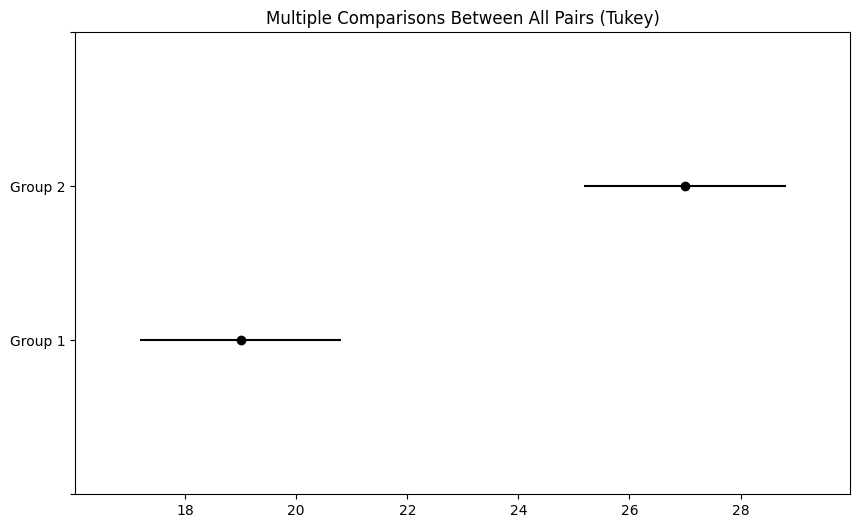

In [33]:
group_1 = [19,17,23,22,17,16]
group_2 = [32,28,31,26,23,24,27,25]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2),
                   'Value': group_1 + group_2})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


t-score: -4.806011273488886
Critical Value: (-2.178812829663418, 2.1788128296634177)
Reject Null Hypothesis (H0)


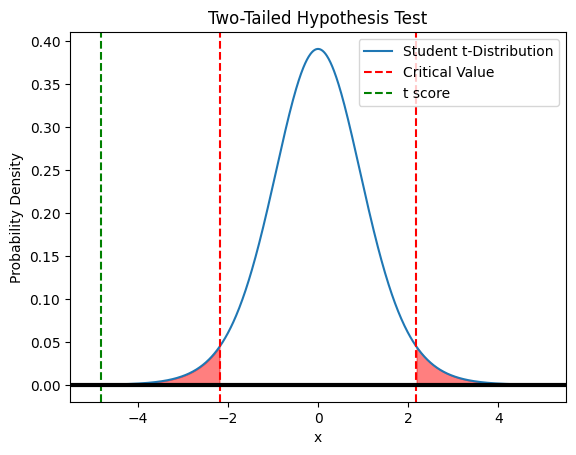

In [35]:
data1 = group_1
data2 = group_2

sample_mean1 = np.mean(data1)
sample_std1 = np.std(data1,ddof=1)
sample_mean2 = np.mean(data2)
sample_std2 = np.std(data2,ddof=1)

n1=len(data1)
n2=len(data2)
alpha = 0.05

sp = (((n1-1)*sample_std1**2)+((n2-1)*sample_std2**2))/(n1+n2-2)
t_score = (sample_mean1-sample_mean2)/(sp*(1/n1+1/n2))**0.5

df=n1+n2-2
perform_two_tailed_hypothesis_test(alpha,t_score,df)

### Question 17

             sum_sq    df        F    PR(>F)
Group     29.795218   3.0  3.34574  0.030767
Residual  97.959609  33.0      NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,2.4255,0.0483,0.0135,4.8375,True
Group 1,Group 3,0.0962,0.9993,-2.0309,2.2234,False
Group 1,Group 4,0.3663,0.9695,-1.8444,2.5769,False
Group 2,Group 3,-2.3293,0.0364,-4.5458,-0.1128,True
Group 2,Group 4,-2.0593,0.0919,-4.356,0.2374,False
Group 3,Group 4,0.27,0.9829,-1.7255,2.2655,False


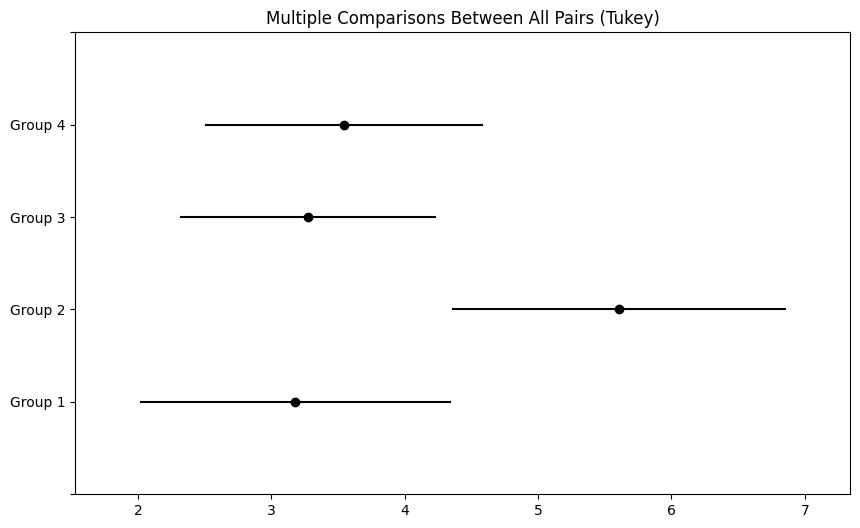

In [38]:
group_1 = [4.19,3.81,1.77,2.83,3.45,4.16,2.89,2.33]
group_2 = [5.49,8.11,6.55,3.39,9.12,2.46,4.11]
group_3 = [5.36,6.99,3.91,3.04,1.9,3.93,1.04,3.98,3.09,2.45,1.42,2.19]
group_4 = [3.64,1.23,5.03,2.64,2.86,5.75,3.17,1.09,4.9,5.14]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3)+
                             ['Group 4'] * len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 18

             sum_sq   df         F    PR(>F)
Block     10.209167  3.0  2.413990  0.164988
variable   3.921667  2.0  1.390936  0.318928
Residual   8.458333  6.0       NaN       NaN


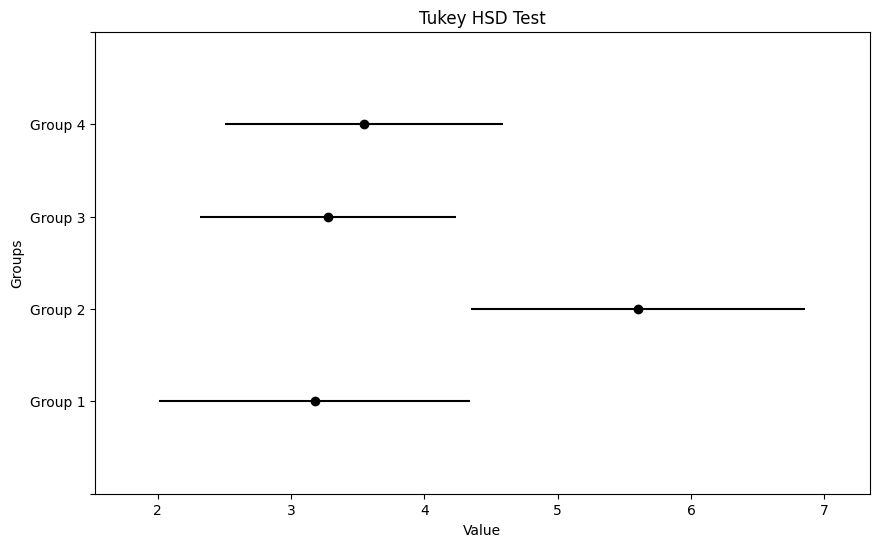

In [41]:

treatment_1 = [22.4,17,19.2,20.3]
treatment_2 = [20.8,19.4,20.2,18.6]
treatment_3 = [21.5,20.7,21.2,20.4]
block = ['Regular','Super Regular','Unleaded','Premium Unleaded']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

### Question 19

          sum_sq   df         F    PR(>F)
Block       21.5  2.0  7.588235  0.022745
variable    25.0  3.0  5.882353  0.032139
Residual     8.5  6.0       NaN       NaN


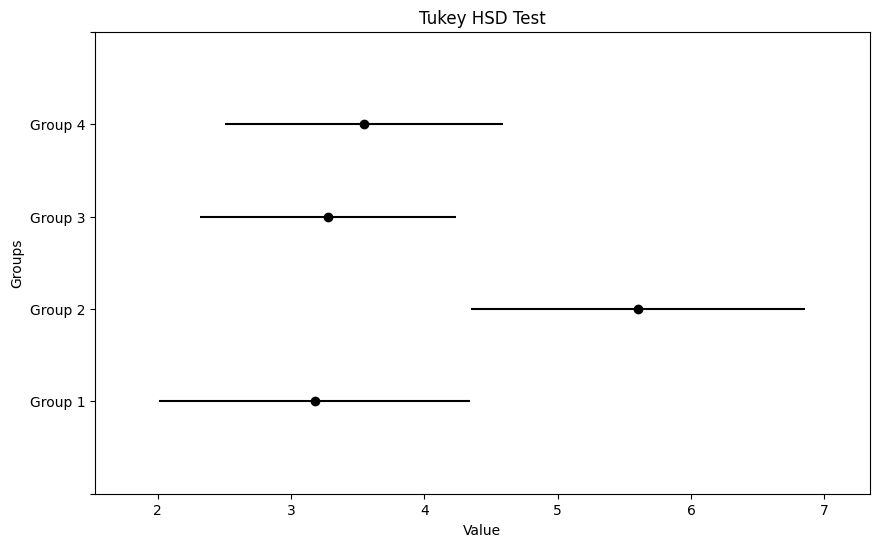

In [46]:

treatment_1 = [2,3,6]
treatment_2 = [3,5,7]
treatment_3 = [3,6,8]
treatment_4 = [8,7,8]
block = ['Small','Medium','Large']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3,'Treatment 4':treatment_4})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

### Question 20

                sum_sq    df         F    PR(>F)
Block     35402.833333   5.0  1.929888  0.148764
variable  31533.000000   3.0  2.864891  0.071692
Residual  55033.500000  15.0       NaN       NaN


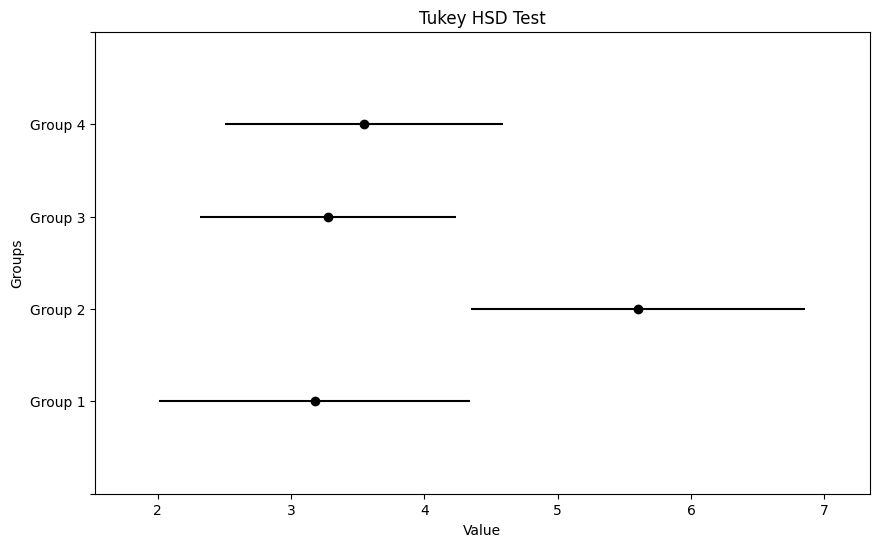

In [51]:

treatment_1 = [124,234,430,105,240,310]
treatment_2 = [160,220,290,245,205,260]
treatment_3 = [320,340,290,310,280,270]
treatment_4 = [190,230,240,170,180,205]
block = ['A','B','C','D','E','F']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3,'Treatment 4':treatment_4})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

### Question 21

          sum_sq    df           F        PR(>F)
Block     4278.7   4.0  100.203747  4.118080e-09
variable    21.4   3.0    0.668228  5.875896e-01
Residual   128.1  12.0         NaN           NaN


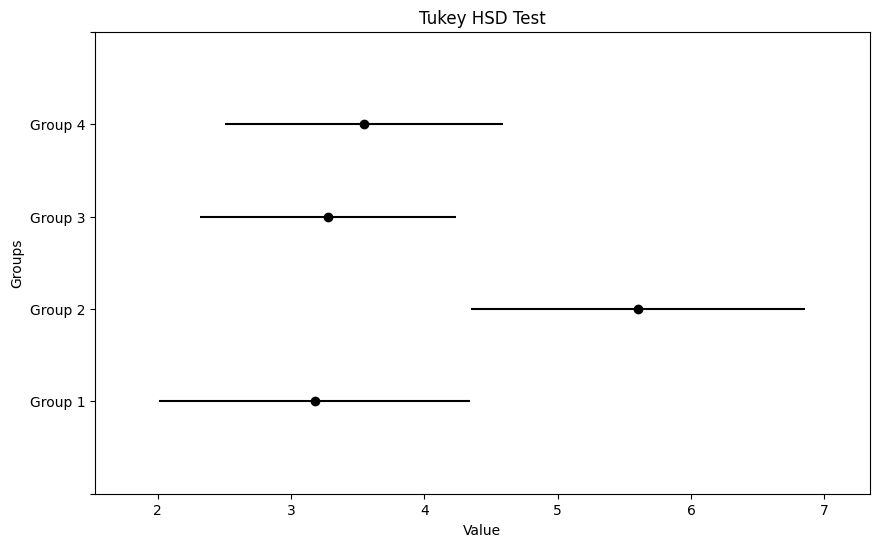

In [54]:

treatment_1 = [53,50,48,70,84]
treatment_2 = [55,51,52,68,89]
treatment_3 = [49,52,47,65,92]
treatment_4 = [45,53,53,64,86]
block = ['A','B','C','D','E']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3,'Treatment 4':treatment_4})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

### Question 22

               sum_sq    df          F    PR(>F)
Group     4542.558923   2.0  12.172509  0.000224
Residual  4478.181818  24.0        NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,25.6667,0.0029,8.4756,42.8578,True
Group 1,Group 3,31.7273,0.0002,15.2341,48.2205,True
Group 2,Group 3,6.0606,0.5919,-9.2718,21.393,False


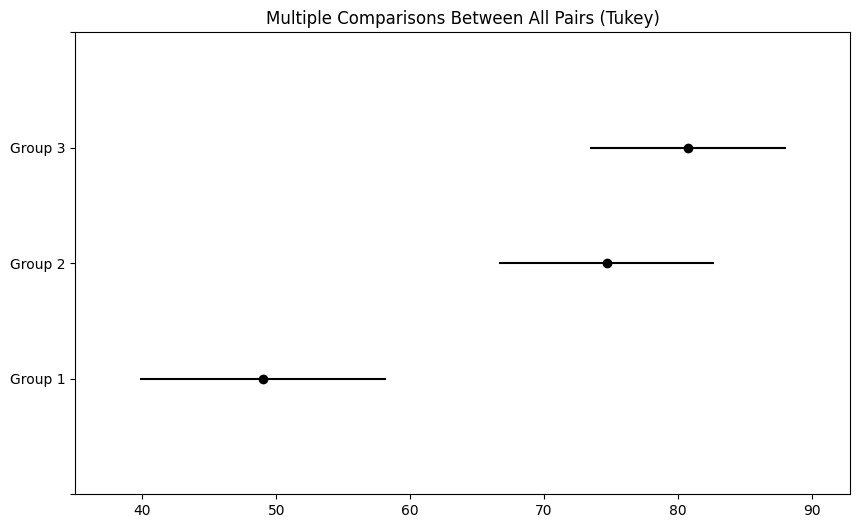

In [55]:
group_1 = [45,47,53,62,39,43,54]
group_2 = [49,57,85,73,81,84,89,92,62]
group_3 = [51,73,82,59,94,89,94,89,89,95,73]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3),
                   'Value': group_1 + group_2 + group_3})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 23

              sum_sq    df         F    PR(>F)
Group      39.959174   3.0  0.869664  0.465258
Residual  582.005588  38.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,0.0765,1.0,-4.1135,4.2665,False
Group 1,Group 3,1.0,0.9443,-3.8307,5.8307,False
Group 1,Group 4,2.85,0.5009,-2.5792,8.2792,False
Group 2,Group 3,0.9235,0.9397,-3.4105,5.2576,False
Group 2,Group 4,2.7735,0.4519,-2.219,7.766,False
Group 3,Group 4,1.85,0.8065,-3.6912,7.3912,False


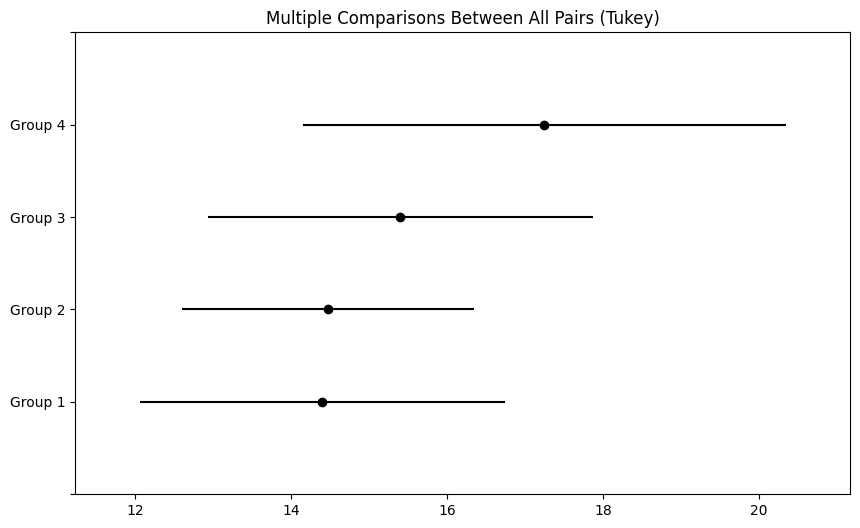

In [56]:
group_1 = [14.2,16.9,12.3,15.6,11.5,24.7,12.2,10.2,13.3,13.1]
group_2 = [11.7,15.8,21.3,13.3,11.4,13,15.9,11.7,10.8,16.2,15.6,11.7,10.8,16.2,15.6,13.7,21.4]
group_3 = [16,17.2,11.6,14.9,15.9,11.6,13.2,12.9,25.3]
group_4 = [13.2,19,25.5,11.8,17.1,16.9]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3) +
                             ['Group 4']*len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


### Question 24

          sum_sq    df         F    PR(>F)
Group       2.68   4.0  0.107143  0.979433
Residual  281.40  45.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-0.5,0.9914,-3.6777,2.6777,False
Group 1,Group 3,0.0,1.0,-3.1777,3.1777,False
Group 1,Group 4,-0.4,0.9964,-3.5777,2.7777,False
Group 1,Group 5,-0.5,0.9914,-3.6777,2.6777,False
Group 2,Group 3,0.5,0.9914,-2.6777,3.6777,False
Group 2,Group 4,0.1,1.0,-3.0777,3.2777,False
Group 2,Group 5,0.0,1.0,-3.1777,3.1777,False
Group 3,Group 4,-0.4,0.9964,-3.5777,2.7777,False
Group 3,Group 5,-0.5,0.9914,-3.6777,2.6777,False
Group 4,Group 5,-0.1,1.0,-3.2777,3.0777,False


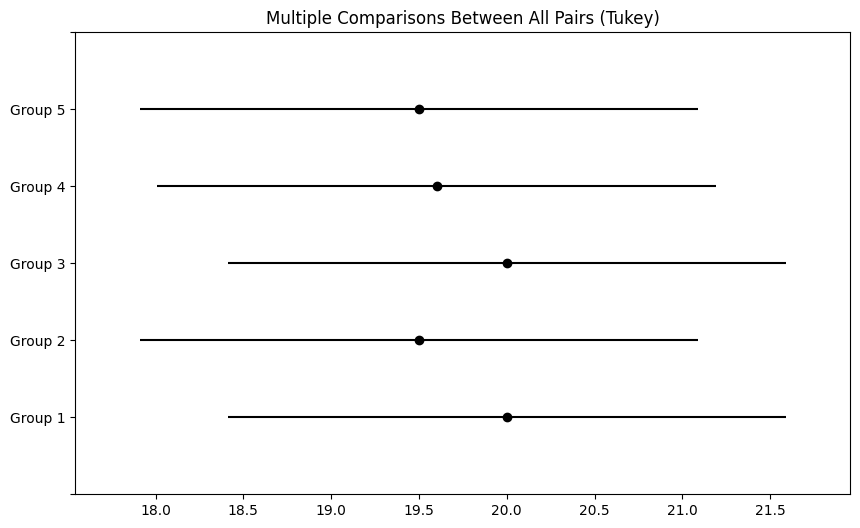

In [58]:
group_1 = [24,21,18,20,23,19,21,15,22,17]
group_2 = [19,20,21,16,22,20,23,18,21,15]
group_3 = [21,23,20,17,22,19,24,18,21,15]
group_4 = [23,19,16,18,21,20,22,15,21,21]
group_5 = [22,20,19,17,21,18,20,18,21,19]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3) +
                             ['Group 4']*len(group_4) +
                             ['Group 5']*len(group_5),
                   'Value': group_1 + group_2 + group_3 + group_4+group_5})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


           sum_sq    df         F   PR(>F)
Group      3.9375   3.0  0.366279  0.77866
Residual  43.0000  12.0       NaN      NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,-1.0,0.8983,-5.2924,3.2924,False
Group 1,Group 3,-1.0,0.8859,-5.1043,3.1043,False
Group 1,Group 4,-1.5,0.7316,-5.7924,2.7924,False
Group 2,Group 3,0.0,1.0,-3.77,3.77,False
Group 2,Group 4,-0.5,0.9814,-4.474,3.474,False
Group 3,Group 4,-0.5,0.9783,-4.27,3.27,False


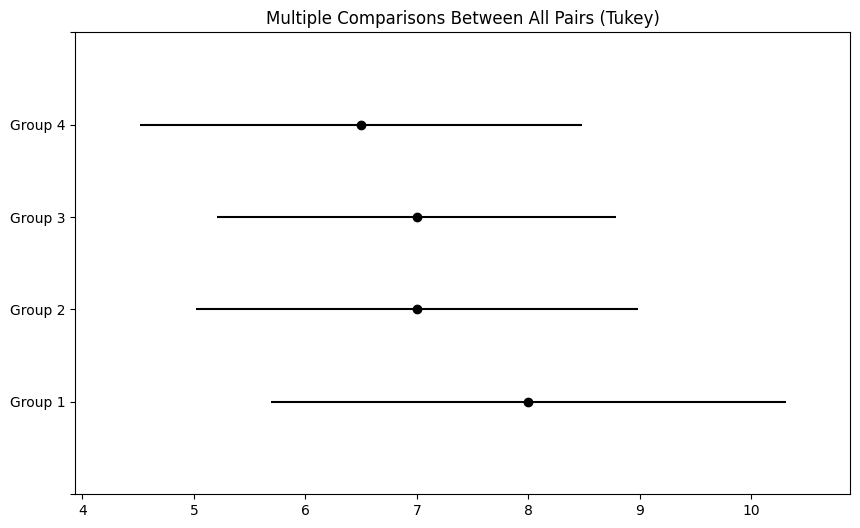

In [59]:
group_1 = [8,7,9]
group_2 = [8,9,6,5]
group_3 = [9,9,6,4,7]
group_4 = [6,7,9,4]
df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3) +
                             ['Group 4']*len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


In [81]:
a=[10,25,17,20,28,30,18,23,18]
pop_mean = 20
t=stats.t.sf((np.mean(a)-pop_mean)/(np.std(a)/len(a)**0.5),df=len(a)-1)
print("T-statistic:",t)
print("p value:",stats.t.sf(t,len(a)-1))
print("alpha:",0.05)

T-statistic: 0.31040682354626126
p value: 0.3820922232804343
alpha: 0.05


In [82]:
x1_x2 = 2
sp = ((5**2*11)+(8**2*9))/(12+10-2)
t = (x1_x2)/np.sqrt(sp*(1/12+1/10))
print("T-score:",t)

T-score: 0.7160766231047028


In [89]:
a = 'A B C D E F G H I J'
w_add = [323,313,326,343,310,320,313,340,330,315]
wo_add = [325,313,320,340,318,312,319,330,333,319]
df = pd.DataFrame({'Blocks':a.split(),"With adiitives":w_add,"Without additives":wo_add})
df = pd.melt(df,id_vars=['Blocks'],var_name='Variable',value_name='Value')
df

,Blocks,Variable,Value
0,A,With adiitives,323
1,B,With adiitives,313
2,C,With adiitives,326
3,D,With adiitives,343
4,E,With adiitives,310
5,F,With adiitives,320
6,G,With adiitives,313
7,H,With adiitives,340
8,I,With adiitives,330
9,J,With adiitives,315


          sum_sq   df          F    PR(>F)
Blocks    1748.8  9.0  10.397146  0.000897
Variable     0.8  1.0   0.042806  0.840696
Residual   168.2  9.0        NaN       NaN


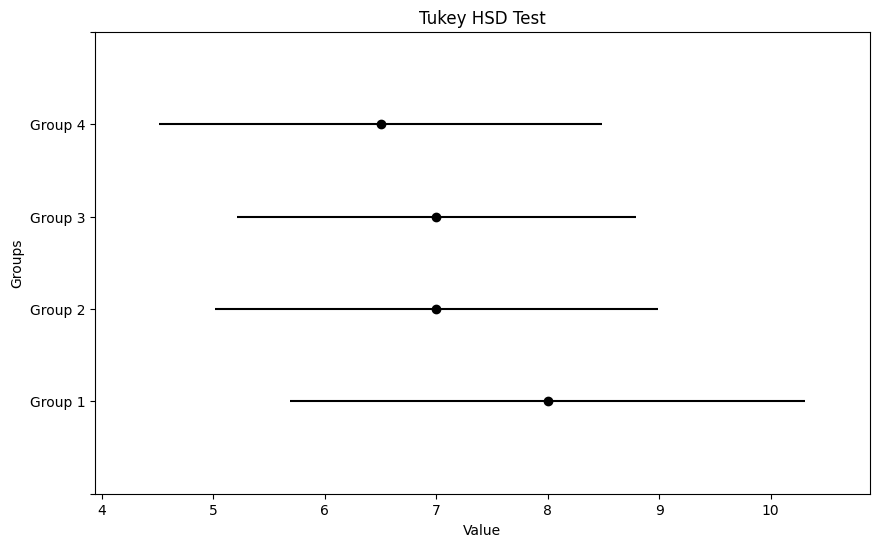

In [91]:
model = ols('Value ~ Blocks + Variable', data=df).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

              sum_sq    df         F    PR(>F)
Group      20.736842   3.0  1.036842  0.404622
Residual  100.000000  15.0       NaN       NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Group 1,Group 2,2.0,0.6629,-2.992,6.992,False
Group 1,Group 3,1.0,0.9305,-3.8036,5.8036,False
Group 1,Group 4,3.0,0.3857,-2.2621,8.2621,False
Group 2,Group 3,-1.0,0.9175,-5.5062,3.5062,False
Group 2,Group 4,1.0,0.9373,-3.992,5.992,False
Group 3,Group 4,2.0,0.6361,-2.8036,6.8036,False


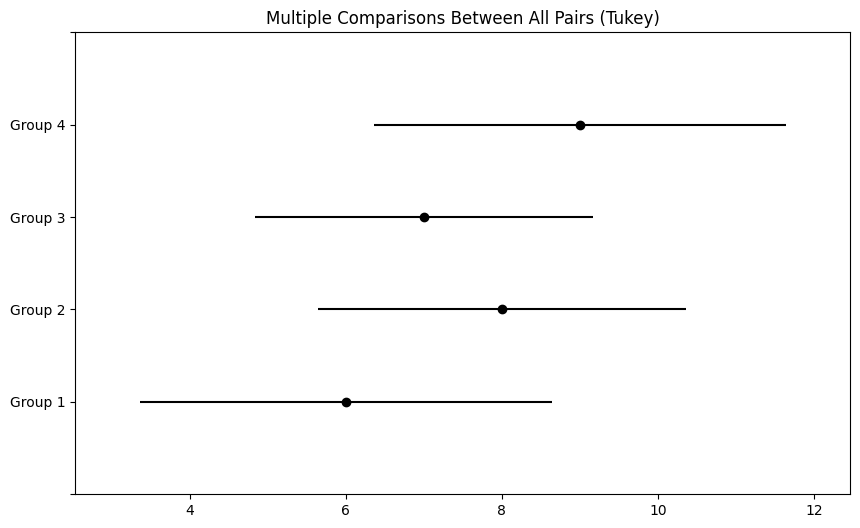

In [92]:
group_1 = [6,8,3,7]
group_2 = [5,10,12,4,9]
group_3 = [7,10,9,4,5,7]
group_4 = [10,9,6,11]

df = pd.DataFrame({'Group': ['Group 1'] * len(group_1) + 
                             ['Group 2'] * len(group_2) + 
                             ['Group 3'] * len(group_3)+
                             ['Group 4'] * len(group_4),
                   'Value': group_1 + group_2 + group_3+group_4})


model = ols('Value ~ Group',                 # Model formula
            data = df).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)
################################################
tukey = pairwise_tukeyhsd(endog=df['Value'],     # Data
                          groups=df['Group'],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
tukey.summary()              # See test summary


              sum_sq   df          F    PR(>F)
Block      22.800000  2.0   3.053571  0.103420
variable  165.733333  4.0  11.098214  0.002386
Residual   29.866667  8.0        NaN       NaN


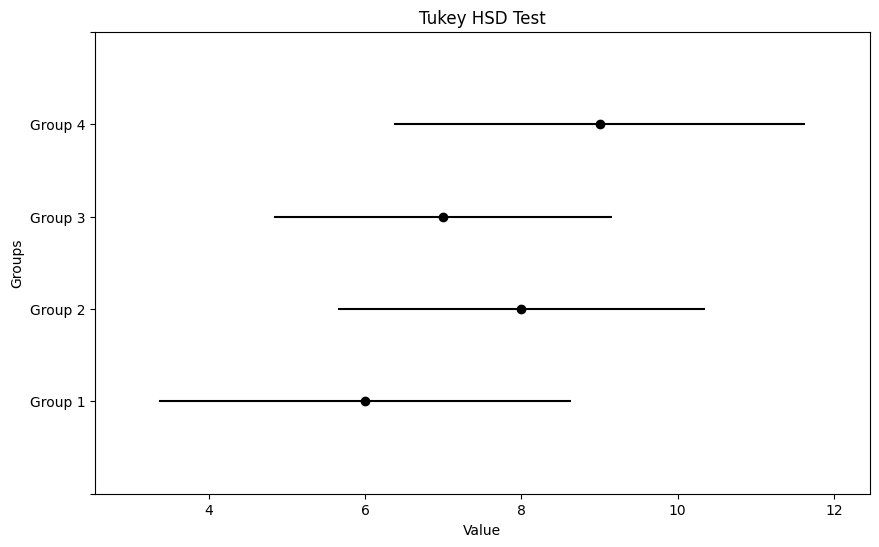

In [94]:

treatment_1 = [15,10,18]
treatment_2 = [13,11,14]
treatment_3 = [7,8,6]
treatment_4 = [16,15,19]
treatment_5 = [9,10,12]
block = ['Dry','Moderate','Moist']

df = pd.DataFrame({'Block':block,'Treatment 1':treatment_1,'Treatment 2':treatment_2,'Treatment 3':treatment_3,'Treatment 4':treatment_4,'Treatment 5':treatment_5})
df_long =pd.melt(df,id_vars=['Block'], value_name='Value')

# Assuming df contains the data for the two-way ANOVA
model = ols('Value ~ Block + variable', data=df_long).fit()

# Perform two-way ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_result)
tukey.plot_simultaneous()
plt.xlabel('Value')
plt.ylabel('Groups')
plt.title('Tukey HSD Test')
plt.show()

In [96]:
3.9**2/2.85**2

1.8725761772853182